<a href="https://colab.research.google.com/github/natalie-ava/workflow_automation/blob/main/NHuang_grids_on_canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Install pdf2image using pip
os.system('pip install pdf2image reportlab')

# Install poppler-utils using apt-get
os.system('apt-get install poppler-utils')

from reportlab.lib import colors

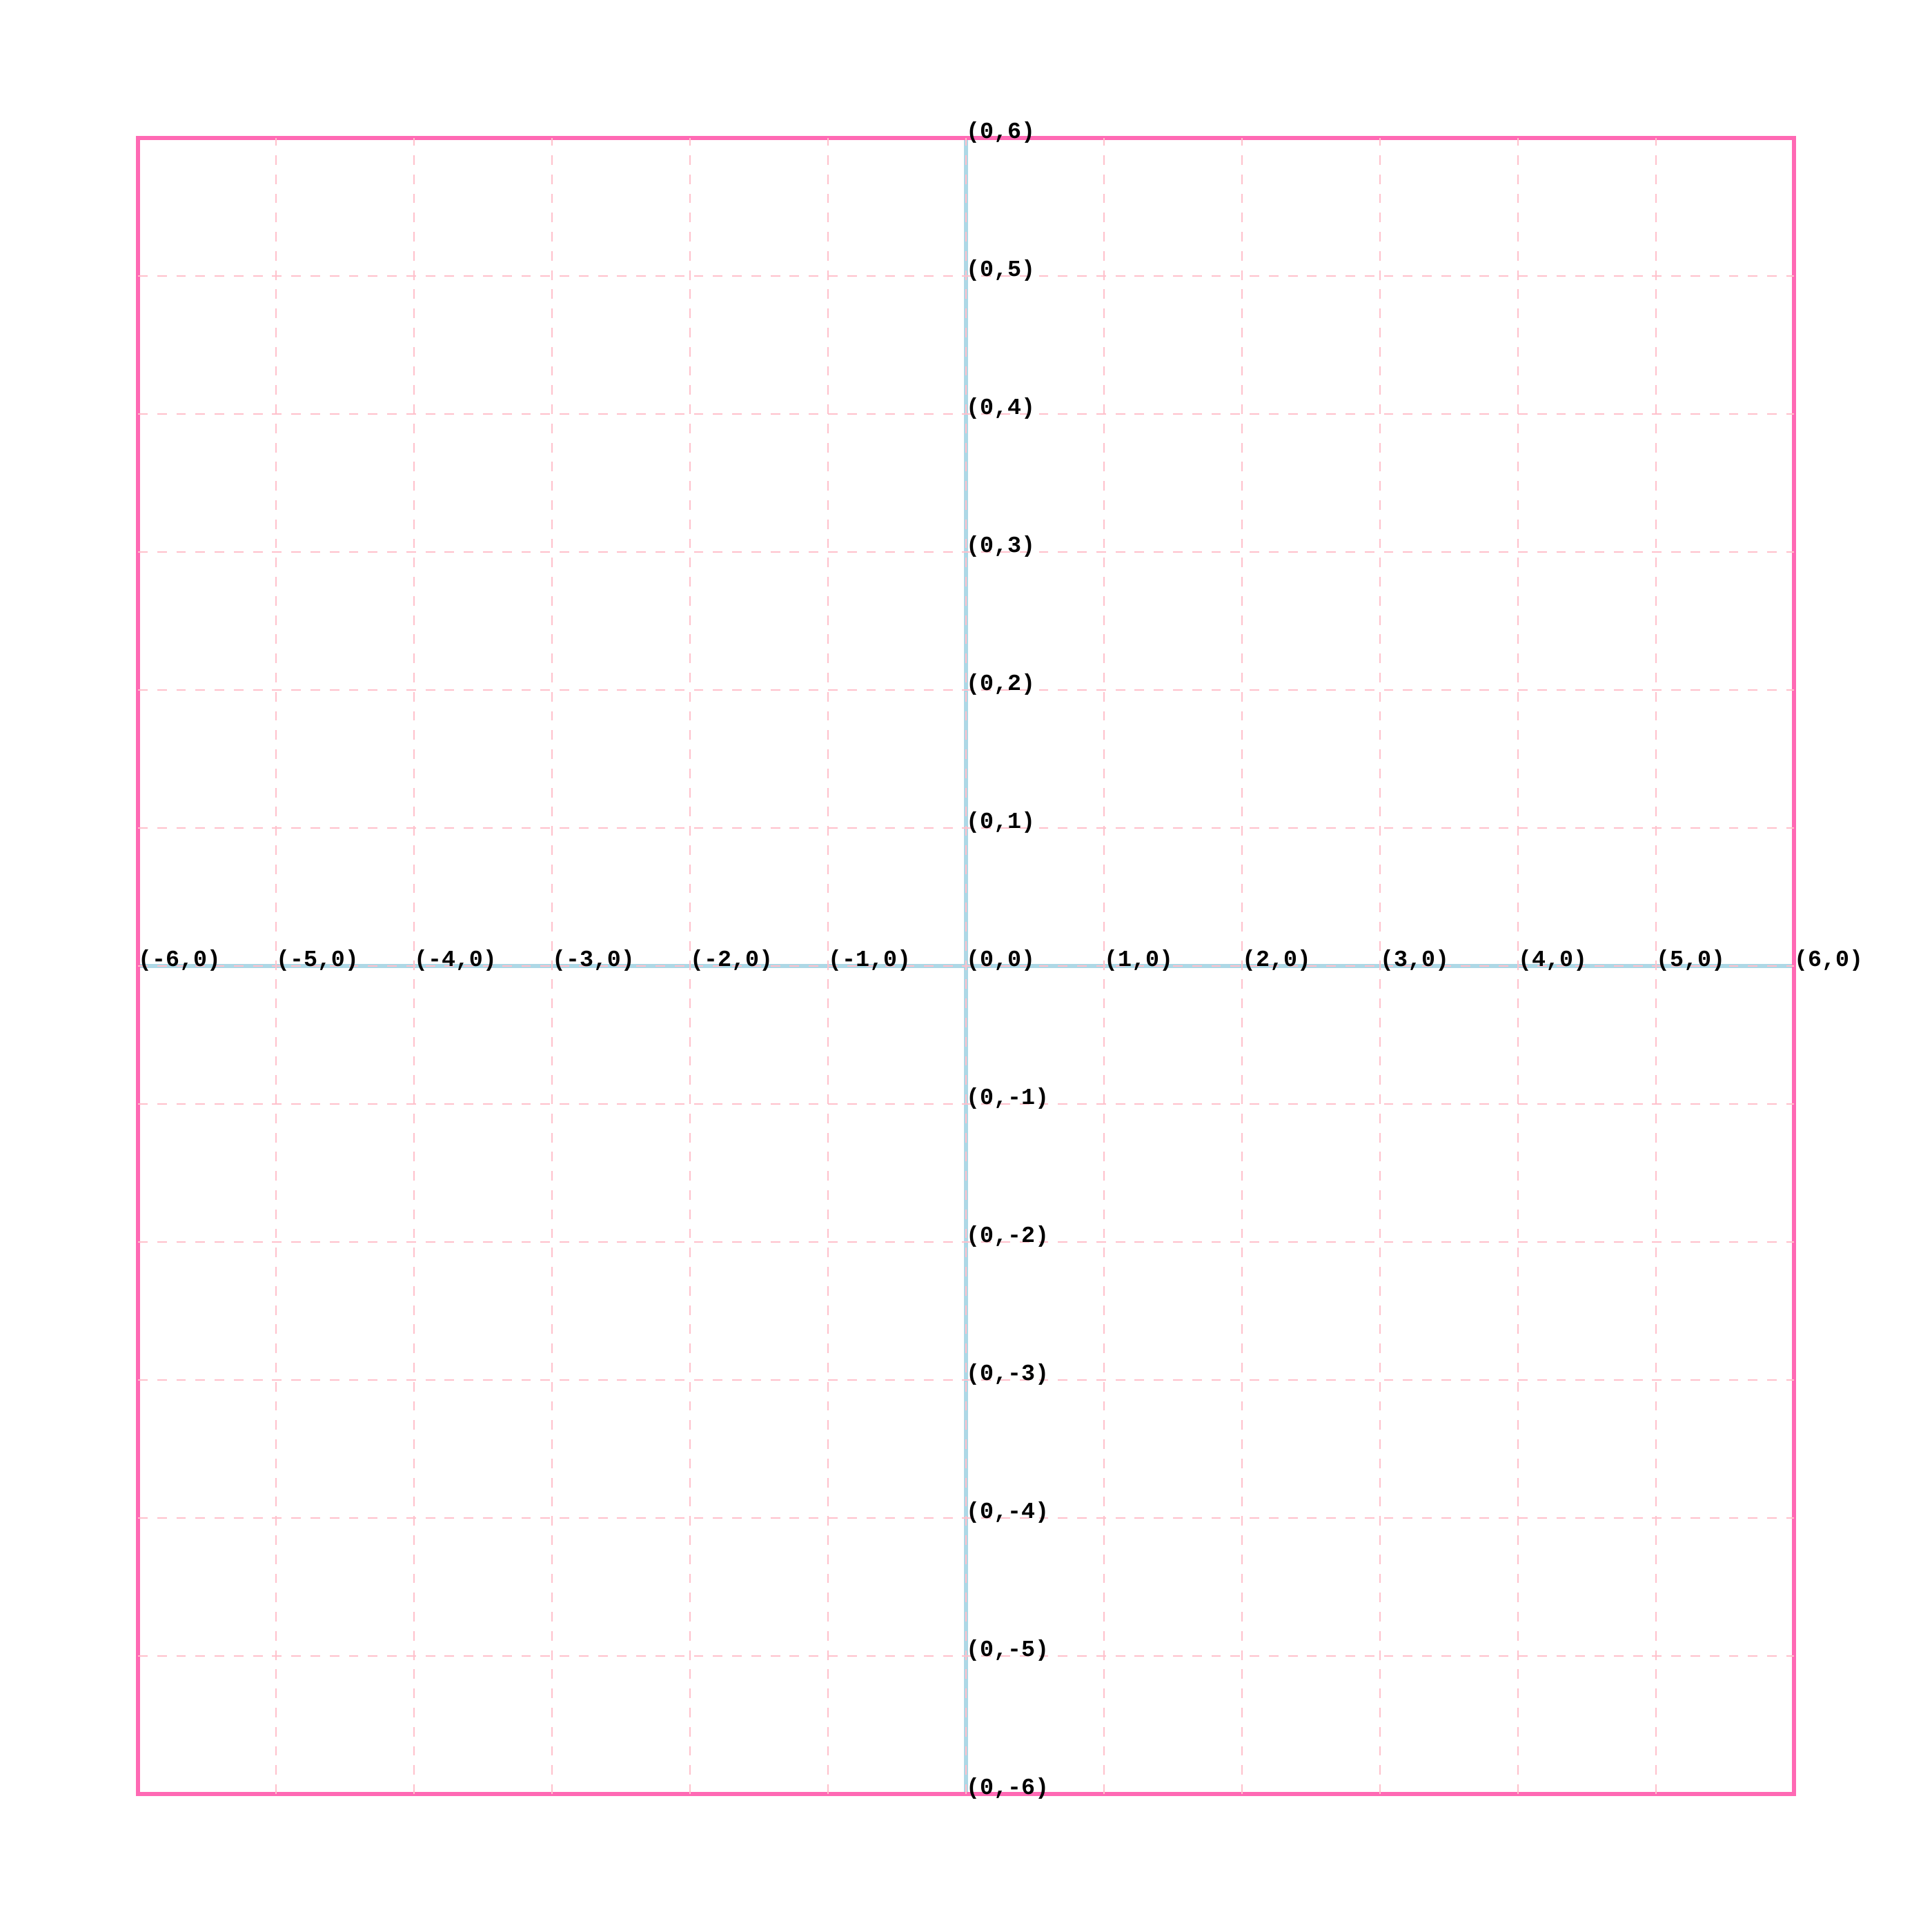

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.colors import pink, lightblue, hotpink
from pdf2image import convert_from_path
import os

# Create a PDF
pdf_file_name = 'moved_axis_example.pdf'
inch = 72  # 1 inch in points
c = canvas.Canvas(pdf_file_name, pagesize=(14*inch, 14*inch))

# Move the origin
c.translate(7*inch, 7*inch)

# Draw new axes
c.setLineWidth(2)
c.setStrokeColor(lightblue)
c.line(-6*inch, 0, 6*inch, 0)  # Translated x-axis
c.line(0, -6*inch, 0, 6*inch)  # Translated y-axis

#Draw Border
c.setLineWidth(2)
c.setStrokeColor(hotpink)
c.rect(-6*inch, -6*inch, 12*inch, 12*inch, fill=0)

# Draw grid
c.setLineWidth(0.5)
c.setStrokeColor(pink)
c.setDash(5,5)
for x in range(-5, 6):
    c.line(x*inch, -6*inch, x*inch, 6*inch)
for y in range(-5, 6):
    c.line(-6*inch, y*inch, 6*inch, y*inch)

# Label the Coordinates
x = 0
y= 0
c.setFont('Courier-Bold',12)
c.drawString(x,y,"(0,0)")

for im in range(1,7):
  x = im*inch
  y = 0
  xr = im
  c.drawString(x,y,f"({xr},{y})")
  x = 0
  y = im*inch
  yr = im
  c.drawString(x,y,f"({x},{yr})")

# negative values
  x = -im*inch
  y = 0
  xr = im
  c.drawString(x,y,f"(-{xr},{y})")
  y = im*-inch
  x = 0
  yr = im
  c.drawString(x,y,f"({x},-{yr})")

# Save the PDF
c.showPage()
c.save()

# Get the absolute path of the PDF file
pdf_file_path = os.path.abspath(pdf_file_name)

# Convert PDF to image(s) using the absolute path
images = convert_from_path(pdf_file_path)

# display the first-page
display(images[0])